<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-Lazy-Programmer/blob/main/Tensorflow_Lazy_Programmer_Section_3(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

In [3]:
from sklearn.datasets import load_breast_cancer #Loading the Data

In [4]:
data=load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target.shape

(569,)

In [9]:
data.target_names#0->Malignant, 1->benign

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
import pandas as pd
df=pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)

In [15]:
N, D =X_train.shape

In [17]:
N,D

(381, 30)

In [21]:
from sklearn.preprocessing import StandardScaler  # Give it 0 Mean and Variance 1

In [22]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test) #We fit on train set as it is going to find the parameters

In [23]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
#Alternative way. Create the equential model and add layers later on
#model=tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense())

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [28]:
r=model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=100
)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.7741 - accuracy: 0.4856 - val_loss: 0.6969 - val_accuracy: 0.5691
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.5564 - val_loss: 0.6399 - val_accuracy: 0.6170
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6168 - val_loss: 0.5906 - val_accuracy: 0.6915
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6798 - val_loss: 0.5473 - val_accuracy: 0.7447
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.7113 - val_loss: 0.5104 - val_accuracy: 0.7872
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5108 - accuracy: 0.7507 - val_loss: 0.4785 - val_accuracy: 0.8032
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4772 - accuracy: 0.7795 - val_loss: 0.4509 - val_accuracy: 0.8404
Epoch 8/100


In [29]:
print("Train_Score: ",model.evaluate(X_train,y_train))
print("Test_Score: ",model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9764
Train_Score:  [0.09161806851625443, 0.9763779640197754]
6/6 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9574
Test_Score:  [0.1303008496761322, 0.957446813583374]


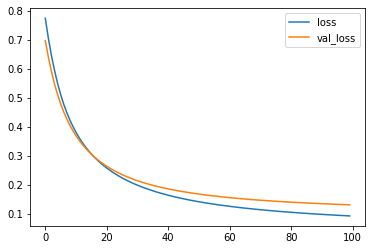

In [30]:
#Plot the Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

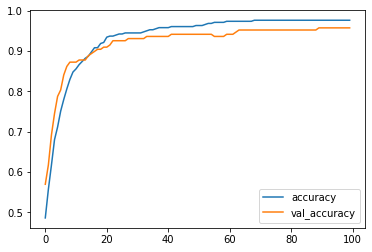

In [32]:
#Plot the accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();